# Aufpassen: Die Summe der Straftatenn ist nicht gleich. Sprich: Die Zahlen wenn man männlich und weiblich zusammenfasst, sind anders als in T01!

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.DataLoaders import T20DataLoader
from src.DataFunctions import get_crime_name, get_cases_by_key, get_column_with_value

In [2]:
# Variables
sex_m = 'M'
sex_w = 'W'
sex_sum = 'X'

age_classes = ['0-13', '14-17', '18-20', '21-24', '25-29', '30-39', '40-49', '50-59', '>60']
cols_of_interest = ['Anzahl erfasste TV'] + age_classes

In [45]:
years = range(2012, 2023)
dl = TvDataLoader()
key_1, key_1_name = '897100', 'Computerbetrug' # Until 2015: 517500
key_1_previous, key_1_previous_until = '517500', 2015 # set to none if no key change, until is last year with the old key
key_2, key_2_name = '510000', 'Betrug'
key_2_previous, key_2_previous_until = None, None # set to none if no key change, until is last year with the old key
sel_sex = sex_sum
data_years = {year: dl[year] for year in years}

In [46]:
def get_data_for_key_and_sex(data, key, sex, years):
    return {year : get_column_with_value(get_cases_by_key(data=data[year], key=key), 
                                               'Sex', 
                                               sex) 
                                               for year in years}

def get_data_with_key_change(data, prev_key, prev_key_from, prev_key_until, new_key, new_key_until):
    d_prev = get_data_for_key_and_sex(data, prev_key, sel_sex, range(prev_key_from, prev_key_until))
    d_new =  get_data_for_key_and_sex(data, new_key, sel_sex, range(prev_key_until, new_key_until))
    d_prev.update(d_new)
    return d_prev

if key_1_previous is not None:
    key_1_data_sex = get_data_with_key_change(data_years, key_1_previous, years[0], key_1_previous_until+1, key_1, years[-1]+1)
else: 
    key_1_data_sex = get_data_for_key_and_sex(data_years, key_1, sel_sex, years)
if key_2_previous is not None: 
    key_2_data_sex = get_data_with_key_change(data_years, key_2_previous, years[0], key_2_previous_until+1, key_2, years[-1]+1)
else:
    key_2_data_sex = get_data_for_key_and_sex(data_years, key_2, sel_sex, years)

In [47]:
def get_yearly_columns_of_interest(data:dict):
    return {year : data[year][cols_of_interest] for year in data}
    
key_1_data = get_yearly_columns_of_interest(key_1_data_sex)
key_2_data = get_yearly_columns_of_interest(key_2_data_sex)

In [48]:
key_1_list = np.zeros((len(years), len(cols_of_interest)), dtype=int)
key_2_list = np.zeros((len(years), len(cols_of_interest)), dtype=int)
for i,year in enumerate(years):
    k_1_y = key_1_data[year]
    k_2_y = key_2_data[year]
    for j,col in enumerate(cols_of_interest):
        key_1_list[i,j] = k_1_y[col].values[0]
        key_2_list[i,j] = k_2_y[col].values[0]

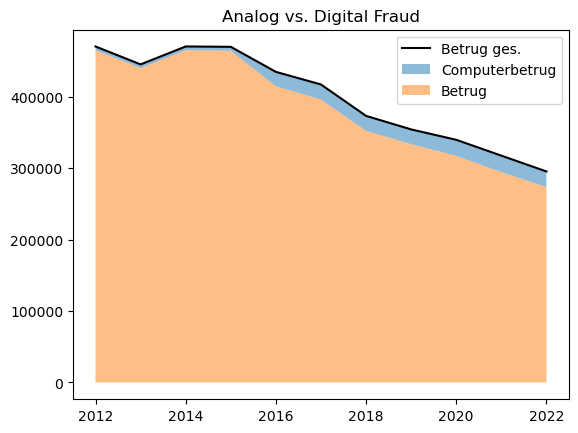

In [49]:
total_cases_1 = key_1_list[:,0]
total_cases_2 = key_2_list[:,0]

fig,ax = plt.subplots()
ax.plot(years,total_cases_2,c='black')
ax.fill_between(years,total_cases_2,total_cases_2-total_cases_1,alpha=.5, )
ax.fill_between(years,total_cases_2-total_cases_1,0,alpha=.5)
ax.set(title='Analog vs. Digital Fraud')
ax.legend(['Betrug ges.',key_1_name,key_2_name])
plt.xticks(rotation=0)
plt.show()

What does this graph show?
- less suspects can be determined
- Not many police stations put suspects in the table if they found them???
- Less cases? No because it rises in the other table

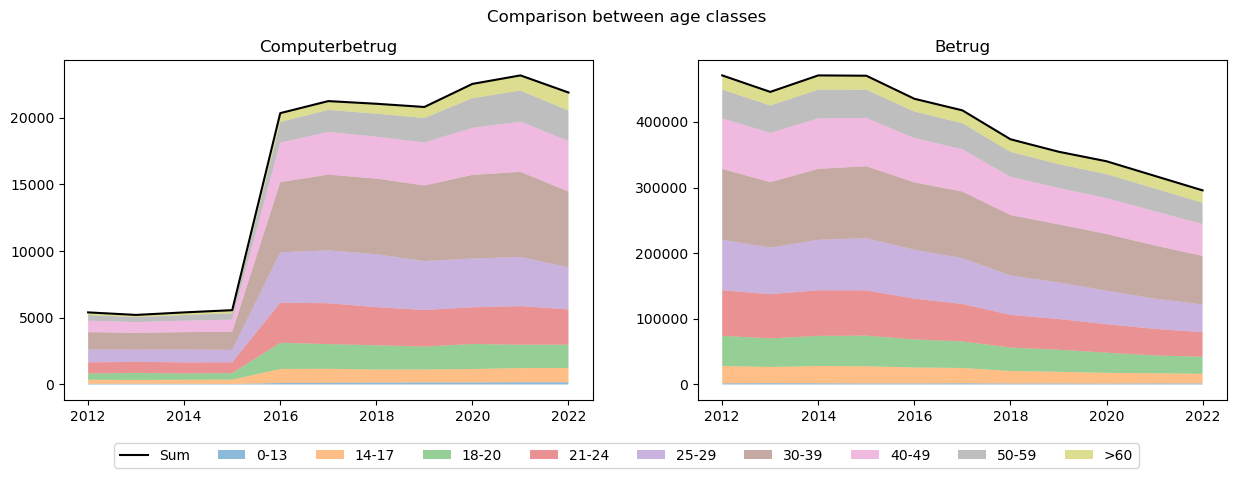

In [50]:
fig,axs = plt.subplots(1,2, figsize=(15,5))
total_height_key_1, total_height_key_2  = 0, 0
axs[0].plot(years,key_1_list[:,0],c='black')
axs[1].plot(years,key_2_list[:,0],c='black')
for age_group_idx in range(1,key_1_list.shape[1]):
    age_group_cases_key_1, age_group_cases_key_2 = key_1_list[:,age_group_idx], key_2_list[:,age_group_idx]
    axs[0].fill_between(years,age_group_cases_key_1+total_height_key_1,total_height_key_1,alpha=.5)
    axs[1].fill_between(years,age_group_cases_key_2+total_height_key_2,total_height_key_2,alpha=.5)
    total_height_key_1 += age_group_cases_key_1 
    total_height_key_2 += age_group_cases_key_2

fig.suptitle('Comparison between age classes')
axs[0].set_title(f'{key_1_name}')
axs[1].set_title(f'{key_2_name}')

# Add legend outside the subplots
fig.legend(['Sum'] + age_classes, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=len(age_classes)+1)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.2)

plt.xticks(rotation=0)
plt.show()

